# Homework2
Ivy (Xinyue) Liu, 
xl438

### 1. Feedforward: Building a ReLU neural network
Consider the rectified linear activation function: $h_j = max(0, a_j)$.
#### 1. Draw a network with:
- 2 input
- 1 hidden layers with 3 hidden units and a
- 1-class output (for binary classification)

<img src="nn_viz.PNG">

#### 2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

Let $f = ReLU$ and $g = sigmoid$,
$$h_1 = f(x_1w_{11} + x_2w_{21} + b_1)$$
$$h_2 = f(x_1w_{12} + x_2w_{22} + b_2)$$
$$h_3 = f(x_1w_{13} + x_2w_{23} + b_3)$$

and thus,
$$y = g(h_1v_1 + h_2v_2 + h_3v_3 + c)$$

If we use matrices to represent, then 
$$\vec{x}^T = 
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$$

$$W = 
\begin{bmatrix} w_{11} & w_{12} & w_{13}\\ w_{21} & w_{22} & w{23} \end{bmatrix}$$

$$\vec{b} = \begin{bmatrix} b_1\\ b_2\\ b_3 \end{bmatrix}$$

$$ \vec{h} = f(\vec{x}W + \vec{b})$$
and thus, 
$$y = g(\vec{v}^{T} \cdot \vec{h} + c)$$

#### 3. Write out the forward-pass function in python, call it ff_nn_ReLu(...)

In [83]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
# ReLU function
def ReLU(x):
    return (x > 0) * x
# sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [85]:
# feed forward function
def ff_nn__ReLU(x, W, b, v, c):
    h = ReLU(np.dot(x, W) + b)
    y = sigmoid(np.dot(h, v) + c)
    return y

#### 4. Suppose you have the following set of weight matrices:

$W^{(1)} = \begin{bmatrix} 1 & -1 & 0 \\ 0 & 0 & 0.5 \end{bmatrix}$

$b^{(1)} = \begin{bmatrix} 0 , 0 , 1 \end{bmatrix}^T$

$V = \begin{bmatrix} 1 \\ 0 \\ -1 \end{bmatrix}$

$c = \begin{bmatrix} 1 \end{bmatrix}$

and a few inputs

$X = \begin{bmatrix} 1 & -1 \\ 0 & -1 \\ 0 & 1 \end{bmatrix}$

what are the class probabilities associated with the forward pass of each
sample?

In [86]:
W = np.array([[1, -1, 0],[0, 0, 0.5]]).reshape(2,3)
b = np.array([0, 0, 1]).reshape(1,3)
V = np.array([1, 0, -1]).reshape(3,1)
c = np.array([1])
X = np.array([[1, -1],[0, -1],[0, 1]]).reshape(3,2)

In [87]:
ff_nn__ReLU(X, W, b, V, c)

array([[0.81757448],
       [0.62245933],
       [0.37754067]])

### 2. Gradient Descent
#### Consider a simple non-convex function of two variables:
$$ f(x, y) = (1 - x^3) + 100 * (y^2 - x)^2 $$
#### 1. What are the partial derivatives of f with respect to x and to y?

$$\frac{\partial f}{\partial x} = -3x^2+200x-200y^2$$

$$\frac{\partial f}{\partial y} = 400y^3-4xy$$

#### 2. Create a visualization of the contours of this function.

In [88]:
def rosenbrock(x, y):
    return (1 - x**3) + 100 * (y**2 - x)**2

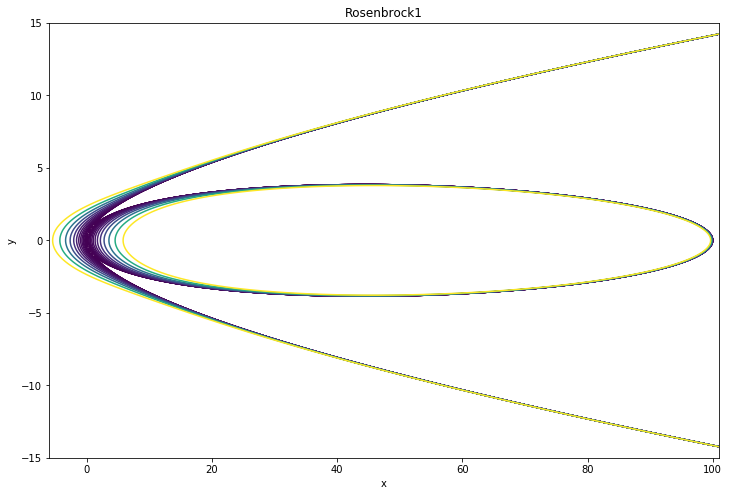

In [89]:
x, y = np.meshgrid(np.linspace(-6, 101, 250), np.linspace(-15, 15, 250))
z = rosenbrock(x, y)
fig, ax = plt.subplots(figsize = (12, 8))
ax.contour(x, y, z, np.logspace(-0.5,3.5,20,40, base=10))
plt.title("Rosenbrock1")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

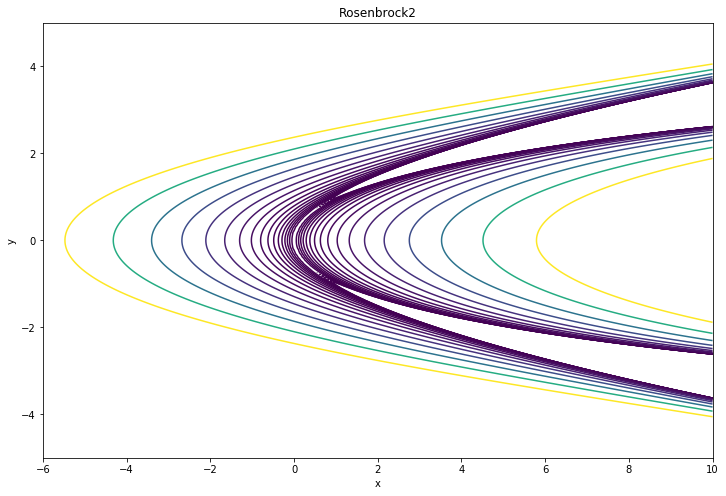

In [90]:
x, y = np.meshgrid(np.linspace(-6, 10, 250), np.linspace(-5, 5, 250))
z = rosenbrock(x, y)
fig, ax = plt.subplots(figsize = (12, 8))
ax.contour(x, y, z, np.logspace(-0.5,3.5,20,40, base=10))
plt.title("Rosenbrock2")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### 3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [91]:
def grad_f(vector):
    x, y = vector
    df_dx = 200*x - 3*x**2 - 200*y**2
    df_dy = 400*y*(-x+y**2)
    return np.array([df_dx, df_dy])
def grad_descent(starting_point=None, iterations=150, learning_rate=0.1):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-5,5,size=2) # random starting pt
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

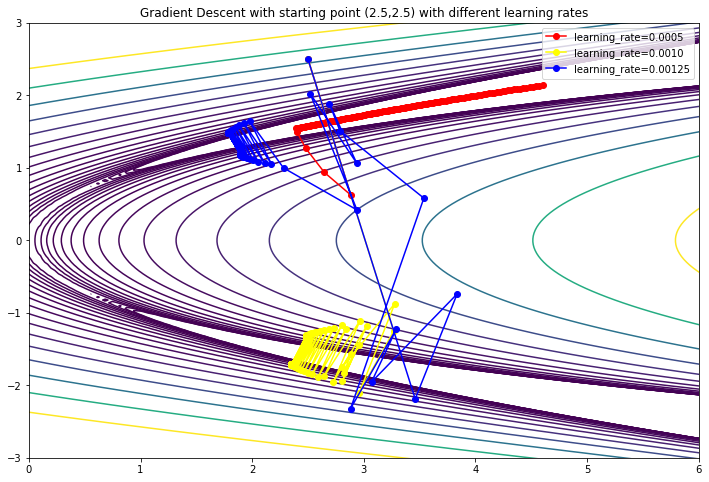

In [92]:
np.random.seed(1031)
traj1 = grad_descent(starting_point=[2.5,2.5], learning_rate=0.0005)
traj2 = grad_descent(starting_point=[2.5,2.5], learning_rate=0.0010)
traj3 = grad_descent(starting_point=[2.5,2.5], learning_rate=0.00125)
fig, ax = plt.subplots(figsize = (12,8))
ax.set_xlim([0, 6])
ax.set_ylim([-3, 3])
CS = ax.contour(x,y,z,np.logspace(-0.5,3.5,20,40, base=10))
plt.plot(traj1[:,0], traj1[:,1], '-o', color = 'red', label = 'learning_rate=0.0005')
plt.plot(traj2[:,0], traj2[:,1], '-o', color = 'yellow', label = 'learning_rate=0.0010')
plt.plot(traj3[:,0], traj3[:,1], '-o', color = 'blue', label = 'learning_rate=0.00125')
plt.title('Gradient Descent with starting point (2.5,2.5) with different learning rates')
plt.legend()
plt.show()

There are two theoretical solutions to rosenbrock function, the first solution is x = 1, y = 1 and the second solution is x = 1, y = -1.

With the change of learning rate, the result of gradient descent can be different. It seems that the blue trajectory is approaching to the first solusion and the yellow trajectory is approaching to the second solution, and the red trajectory is going to the wrong direction.

#### 4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm's hyperparameters.

In [93]:
def grad_descent_with_momentum(starting_point=None, iterations=150, epsilon=0.0005, alpha = 0.7):
    if starting_point:
        point = starting_point
        v = np.zeros(len(point))
    else:
        point = np.random.uniform(-5,5,size=2) # random point
        v = np.zeros(point.size)
    trajectory = [point]
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

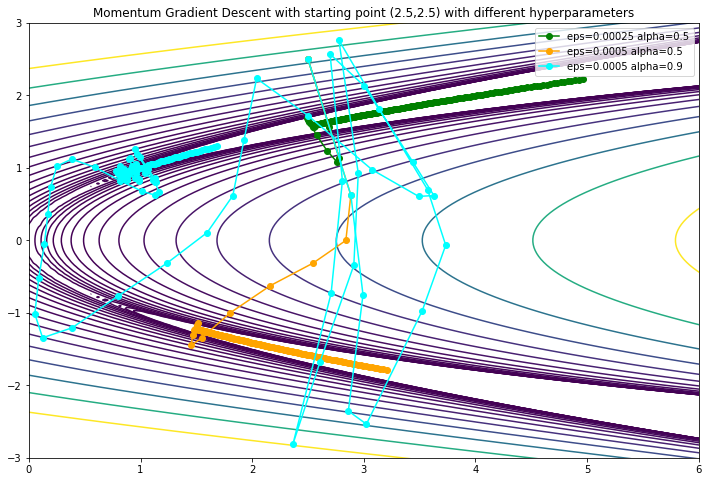

In [94]:
np.random.seed(1031)
traj1 = grad_descent_with_momentum(starting_point=[2.5,2.5], epsilon=0.00025, alpha=0.5)
traj2 = grad_descent_with_momentum(starting_point=[2.5,2.5], epsilon=0.0005, alpha=0.5)
traj3 = grad_descent_with_momentum(starting_point=[2.5,2.5], epsilon=0.0005, alpha=0.9)
fig, ax = plt.subplots(figsize = (12,8))
ax.set_xlim([0,6])
ax.set_ylim([-3, 3])
CS = ax.contour(x, y, z, np.logspace(-0.5,3.5,20,40, base=10))
plt.plot(traj1[:,0], traj1[:,1], '-o', color = 'green', label = 'eps=0.00025 alpha=0.5')
plt.plot(traj2[:,0], traj2[:,1], '-o', color = 'orange', label = 'eps=0.0005 alpha=0.5')
plt.plot(traj3[:,0], traj3[:,1], '-o', color = 'cyan', label = 'eps=0.0005 alpha=0.9')
plt.title('Momentum Gradient Descent with starting point (2.5,2.5) with different hyperparameters')
plt.legend()
plt.show()

The value of epsilon indicates how much the recent gradient weighs in current momentum. 

The value of alpha indicates how much the previous momentum weighs in current momentum.

### 3. Backprop

#### 1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

Let f the ReLU function and g the sigmoid function.

Derivative of f (ReLU function):
$$ReLU(x) = max(0,x)$$
$$\frac{df}{dx} = \frac{d}{dx} max(0,x) = \left\{
                \begin{array}{ll}
                      0,  if x<0 \\
                      1,  if x>0
                \end{array}
              \right.$$
              
Derivative of g (sigmoid function):
$$\sigma(x) = \frac{1}{1+e^{-x}}$$
$$\frac{dg}{dx} = \frac{d}{dx} \sigma(x) = \sigma(x)(1-\sigma(x))$$

$in_i (i = 1,2,3)$:
$$in_i = x_1w_{1i}+x_2w{2i}+b_i$$

$out_i (i = 1,2,3)$:
$$out_i = f(in_i)$$

Let y be the actual y value and $\hat y$ be the output y value:
$$L = -y log(\hat y) - (1-y)log(1-\hat y)$$
$$\frac{\partial L}{\partial \hat y} = -(\frac{y}{\hat y} - \frac{1-y}{1-\hat y})$$

$c$ (bias to output):
$$\frac{\partial L}{\partial c} = \frac{\partial L}{\partial \hat y} \frac{\partial \hat y}{\partial c} =  -(\frac{y}{\hat y} - \frac{1-y}{1-\hat y}) (\hat y (1 - \hat y))$$

$v_i (i = 1, 2, 3)$:
$$\frac{\partial L}{\partial v_i} = \frac{\partial L}{\partial \hat y} \frac{\partial \hat y}{\partial v_i} = \frac{\partial L}{\partial \hat y}(\hat y (1 - \hat y)) out_i$$

$b_i$ (bias to hidden layer node, $i = 1,2,3$):
$$\frac{\partial L}{\partial b_i} = \frac{\partial L}{\partial \hat y} \frac{\partial \hat y}{\partial out_i}\frac{\partial out_i}{\partial in_i}\frac{\partial in_i}{\partial b_i} = \frac{\partial L}{\partial \hat y}(\hat y (1 - \hat y))v_i\frac{\partial f}{\partial in_i}(in_i)$$

$w_{ij}$ (weight of $x_1$ and $x_2$, $i = 1,2,3$, $j = 1,2,3$):
$$\frac{\partial L}{\partial w_{ij}} = \frac{ \partial L}{\partial \hat y} \frac{\partial \hat y}{\partial out_j}\frac{\partial out_j}{\partial in_j}\frac{\partial in_j}{\partial w_{ij}} = \frac{\partial L}{\partial \hat y}(\hat y (1 - \hat y))v_j\frac{\partial f}{\partial in_j}(in_j)x_i$$

#### 2. Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [132]:
def ReLU_derivative(x):
    return np.where(x>0, 1, 0)

In [133]:
def grad_f(x, y, params):
    W, V, b, b_y = params
    a = np.dot(x, W) + b
    h = ReLU(a)
    y_hat = sigmoid(np.dot(h, V) + b_y)
    
    dL_dby = (y_hat-y).sum()
    dL_dv = h.T.dot(y_hat-y)
    dL_db =((y_hat-y).dot(V.T)*ReLU_derivative(a)).sum(axis=0)
    dL_dw = x.T.dot((y_hat-y).dot(V.T)*ReLU_derivative(a))
    return (dL_dw, dL_dv, dL_db, dL_dby)

In [141]:
x2 = np.random.randn(1000).reshape((500,2))
y2 = np.random.randn(500).reshape((500,1))
W2 = np.random.randn(6).reshape(2,3)
b2 = np.random.randn(3).reshape(1,3)
V2 = np.random.randn(3).reshape(3,1)
c2 = np.random.randn(1)
p2 = (W2, V2, b2, c2)
grad_f(x2, y2, p2)

(array([[-25.93548674, -37.58407765, -17.05561882],
        [ 20.05224772,  20.07156192,   8.63903906]]), array([[-7.89464707],
        [43.41909382],
        [-5.14450851]]), array([-42.59284892, -41.96421122,   8.79268221]), 91.82005917493223)

#### 3. Generate a synthetic dataset like the XOR pattern (see below).

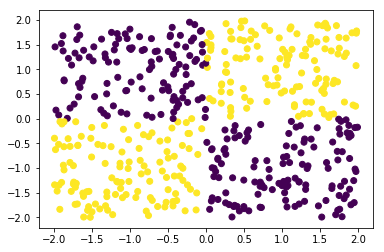

In [211]:
x3 = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y3 = np.zeros((500,1))
y3[np.logical_and(x3[:,0]>0, x3[:,1]>0)] = 1
y3[np.logical_and(x3[:,0]<0, x3[:,1]<0)] = 1
plt.scatter(x3[:,0],x3[:,1],c=y3[:,0])

#### 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [159]:
def cross_entropy_loss(y, yhat):
    # Binary cross entropy
    total = y * np.log(yhat)+(1-y)*np.log(1-yhat)
    return -total.sum()

def forward(x, p):
    w, v, b, c = p
    h = ReLU(np.dot(x, w) + b)
    y = sigmoid(np.dot(h, v) + c)
    return y

In [160]:
def GD_xor(x, y, starting_point=None, iterations=10, learning_rate=1e-1):   
    point = starting_point
    trajectory = [point]
    losses = [cross_entropy_loss(y, forward(x, point))]
    
    for i in range(iterations):
        grads = grad_f(x, y, point)
        update = []
        for (matrix, grad) in zip(point, grads):
            update.append(matrix - learning_rate*grad)
        point = tuple(update)
        trajectory.append(point)
        losses.append(cross_entropy_loss(y, forward(x, point)))
    return (np.array(trajectory), losses)

Text(0,0.5,'Total Loss')

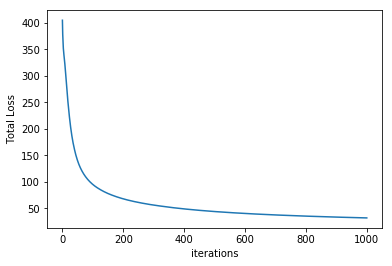

In [204]:
w3 = np.random.randn(6).reshape(2,3)
b3 = np.random.randn(3).reshape(1,3)
v3 = np.random.randn(3).reshape(3,1)
c3 = np.random.randn(1)
traj, losses = GD_xor(x3, y3, (w3, v3, b3, c3), iterations=1000, learning_rate=1e-3)
plt.plot(losses)
plt.xlabel('iterations')
plt.ylabel('Total Loss')

#### 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [205]:
def GDM_xor(x, y, starting_point, iterations=10, epsilon=1e-2, alpha=0.001):
    point = starting_point 
    trajectory = [point]
    losses = [cross_entropy_loss(y, forward(x, point))]
    vs = np.zeros(len(starting_point))
    
    for i in range(iterations):
        grads = grad_f(x,y,point)
        update = []  
        for (matrix, grad, v) in zip(point, grads, vs):
            update.append(matrix - epsilon*grad-alpha*v)
        
        vs = grads
        point = tuple(update)
        trajectory.append(point)
        losses.append(cross_entropy_loss(y, forward(x, point)))      
    return (np.array(trajectory), losses)

Text(0,0.5,'Total Loss')

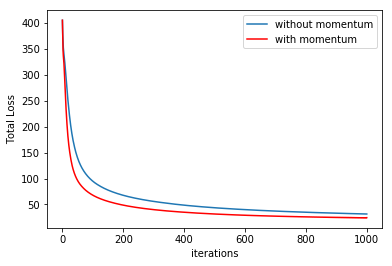

In [206]:
traj2, losses2 = GDM_xor(x3, y3, starting_point=(w3, v3, b3, c3), iterations=1000, epsilon=1e-3, alpha=0.001)
plt.plot(losses,label='without momentum')
plt.plot(losses2,label='with momentum', color = 'red')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('Total Loss')

Based on the visualizations above, grad descent with momentum takes less iterations to converge than grad descent without momentum. 

In this case, grad descent with momentum converge more efficiently.

#### 6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

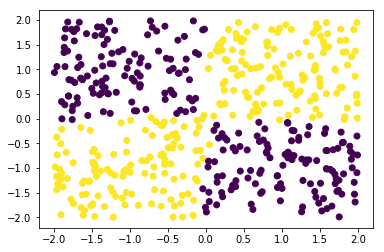

In [207]:
y_pred = forward(x3, traj[-1])
y_pred[y_pred >=0.5] = 1
y_pred[y_pred < 0.5] = 0
plt.scatter(x3[:,0],x3[:,1],c=y_pred[:,0])

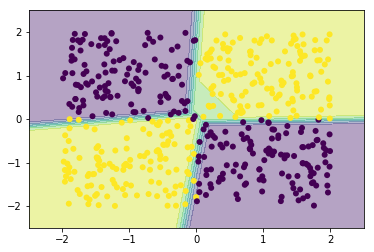

In [210]:
x_span = np.linspace(-2.5, 2.5, 1000)
y_span = np.linspace(-2.5, 2.5, 1000)
xx, yy = np.meshgrid(x_span, y_span)
labels = forward(np.c_[xx.ravel(), yy.ravel()], traj[-1])
z = labels.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, alpha=0.4)
# Get predicted labels on training data and plot
ax.scatter(x3[:,0],x3[:,1], c=y3[:,0], lw=0)
plt.show()

By observing the plot, there are some points mis-classified but overall the model is doing great job.